# **Burhanuddin Abizer Hariyanawala**
### Intern Id : *OIB/M1/IP7734*

## Task 3 : **CAR PRICE PREDICTION WITH MACHINE LEARNING**

### *The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.*


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [80]:
pd.set_option("display.max_columns",None)

In [81]:
car_data = pd.read_csv('/content/CarPrice.csv' , index_col='car_ID')
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [83]:
car_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [84]:
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [85]:
car_data['CarName'] = car_data['CarName'].apply(lambda x : x.split(" ")[0])

In [86]:
car_data['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

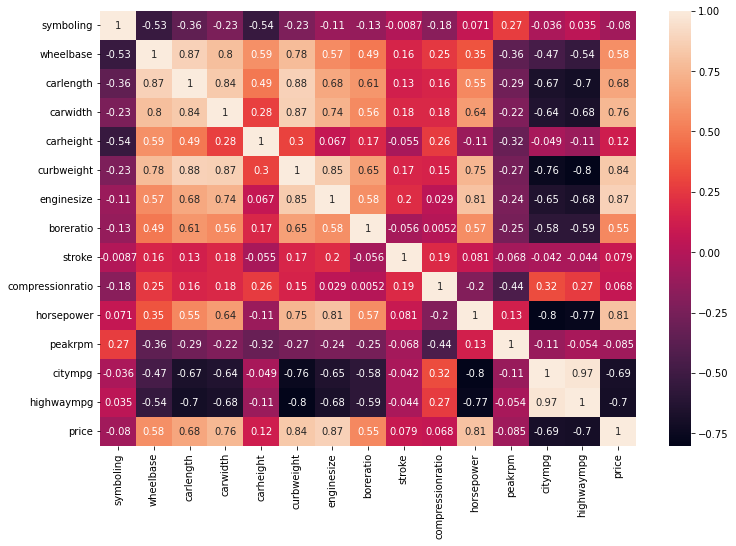

In [87]:
plt.subplots(figsize=(12,8))
sns.heatmap(car_data.corr() , annot=True )
plt.show()

In [88]:
car_data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [89]:
car_data['CarName'] = car_data['CarName'].str.lower()

def replace_name(x,y):
  car_data['CarName'].replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')


car_data.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Axes: ylabel='price'>

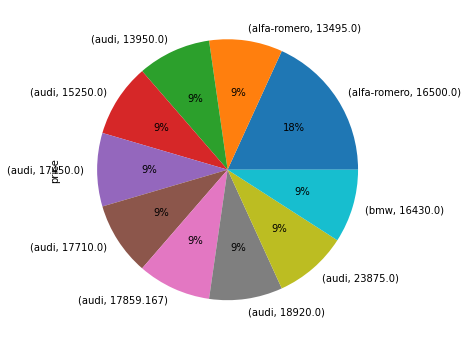

In [90]:
car_data.groupby('CarName')['price'].value_counts()[:10].plot(kind='pie' , autopct="%1.0f%%" , figsize=(12,6))

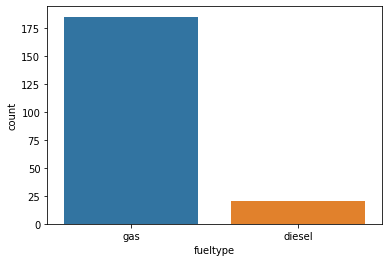

In [91]:
sns.countplot(x=car_data.fueltype)
plt.show()

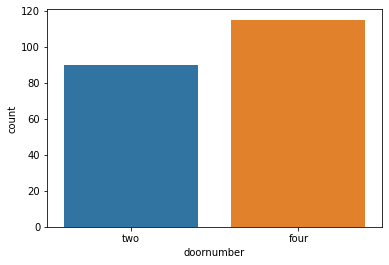

In [92]:
sns.countplot(x=car_data.doornumber)
plt.show()

In [93]:
car_data[car_data['horsepower']>100]['price'].mean()

18816.21377173913

In [94]:
car_data[car_data['horsepower']<100]['price'].mean()

8741.387387387387

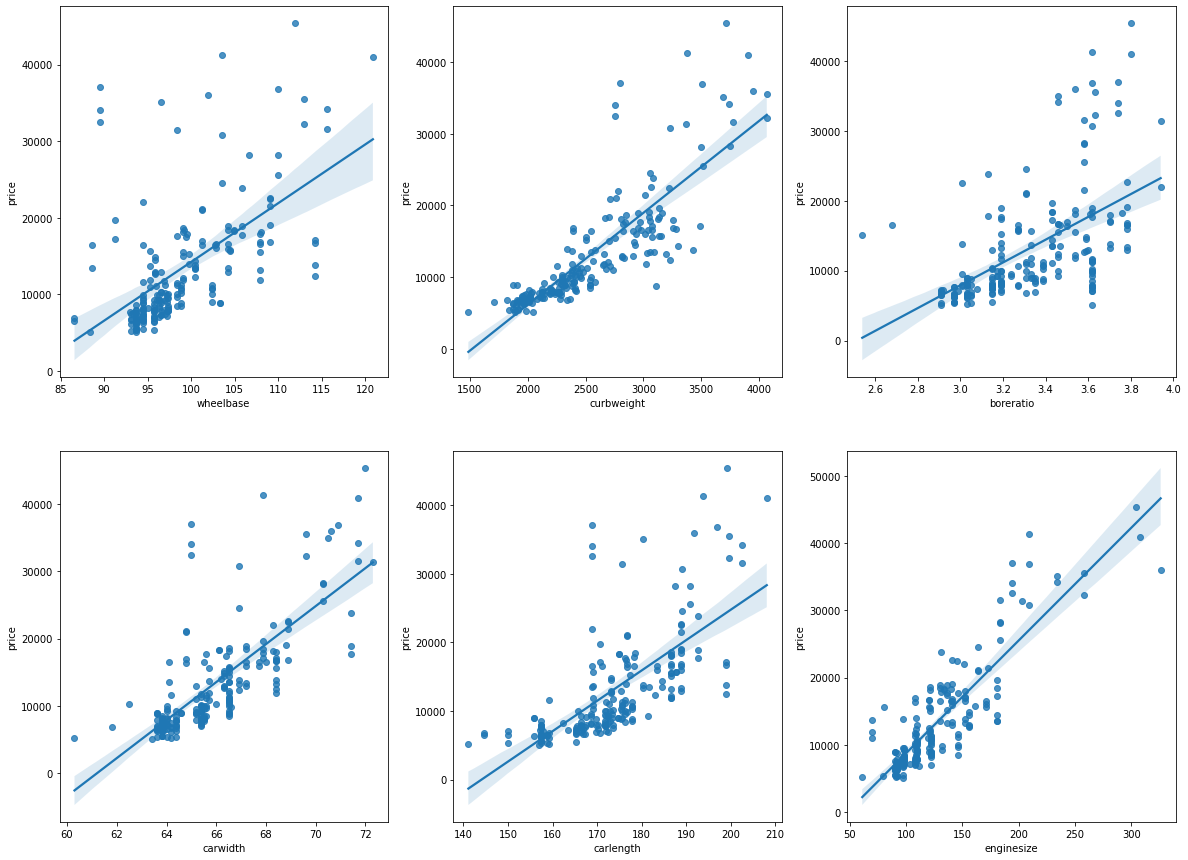

In [95]:
columns=['wheelbase','curbweight','boreratio','carwidth','carlength','enginesize']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'price', data = car_data)
plt.show()

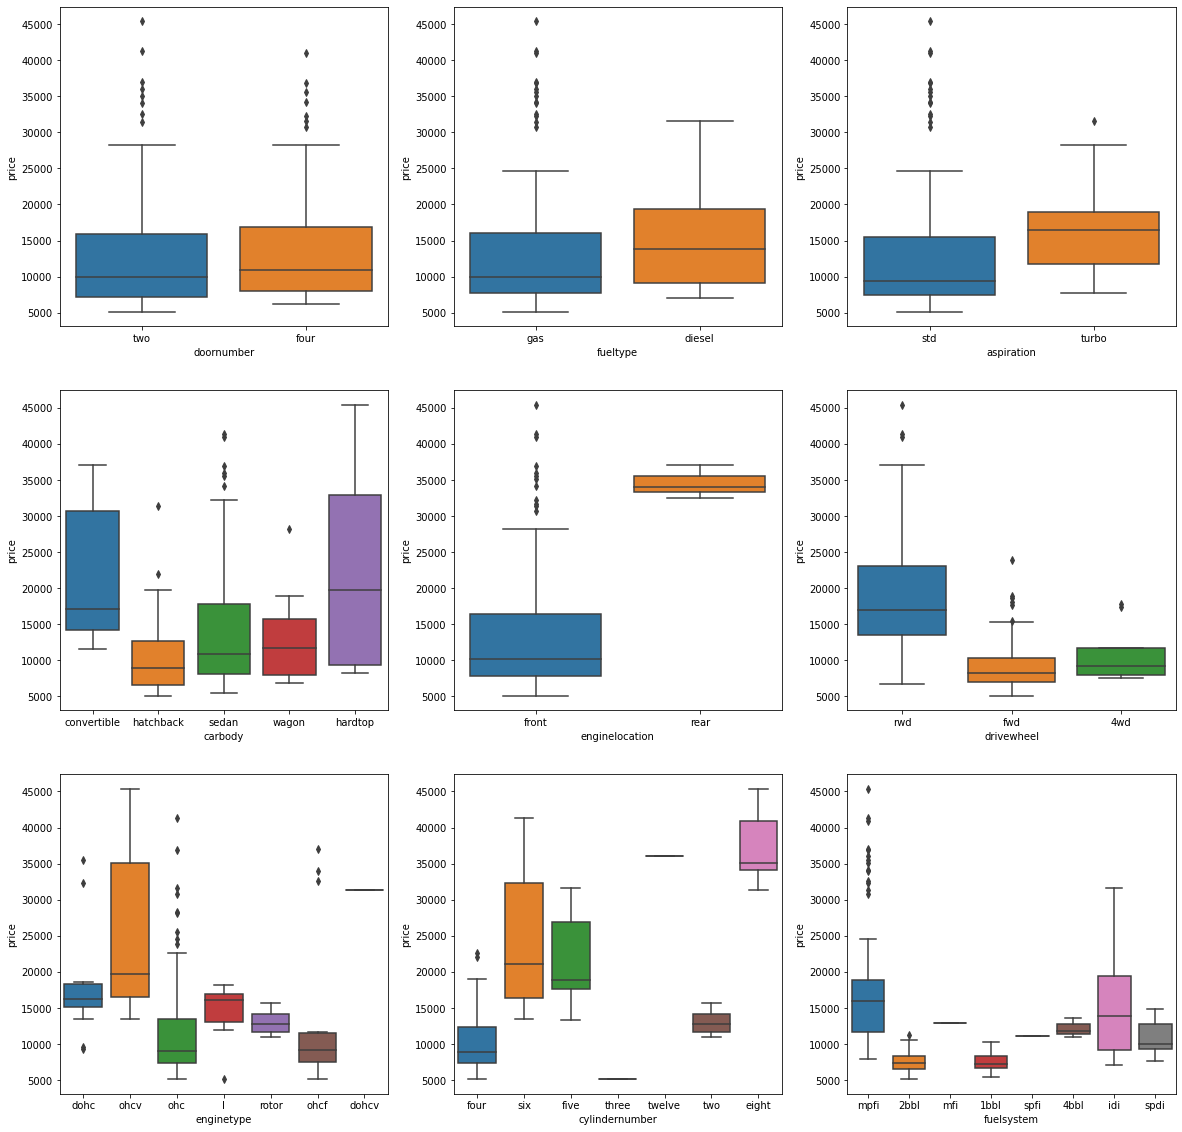

In [96]:
plt.figure(figsize=(20, 20))
columns=['doornumber','fueltype','aspiration','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem']
i=0
for col in columns:
    i=i+1
    plt.subplot(3,3,i)
    sns.boxplot(x = col, y = 'price', data = car_data)
plt.show()

<Axes: ylabel='price'>

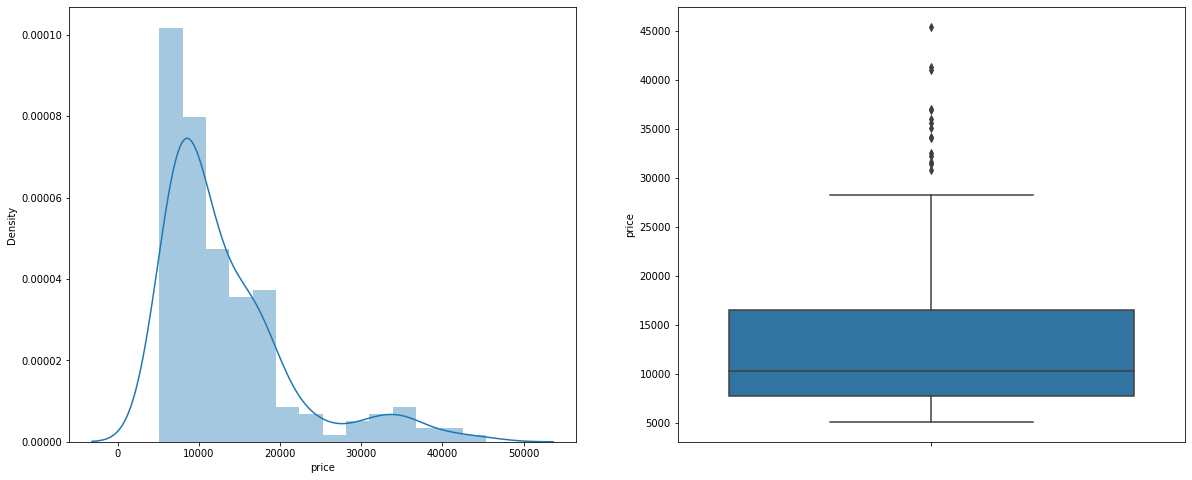

In [97]:
plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(car_data.price)

plt.subplot(1,2,2)
sns.boxplot(y=car_data.price)

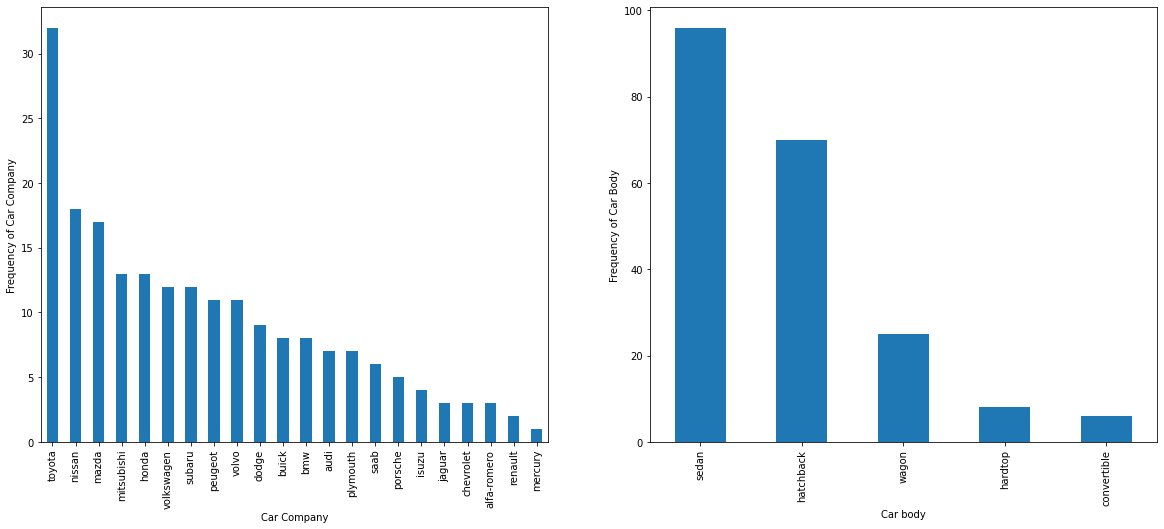

In [98]:
plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
plt1 = car_data.CarName.value_counts().plot(kind='bar')
plt1.set(xlabel="Car Company" , ylabel="Frequency of Car Company")

plt.subplot(1,2,2)
plt2 = car_data.carbody.value_counts().plot(kind='bar')
plt2.set(xlabel="Car body" , ylabel='Frequency of Car Body')

plt.show()

Text(0.5, 1.0, 'Car Body vs Price')

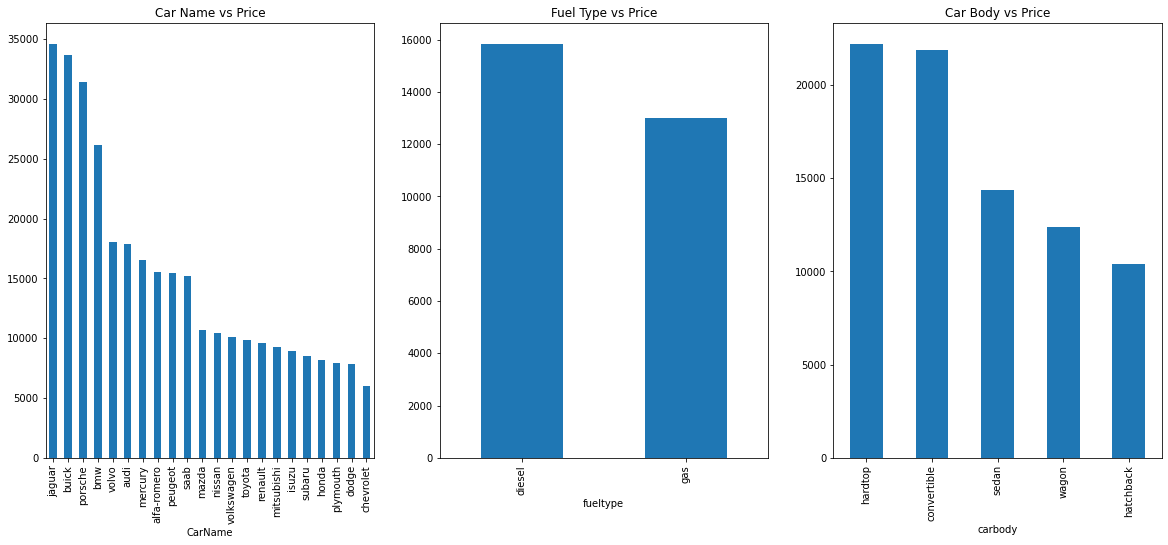

In [99]:
plt.subplots(figsize=(20,8))

plt.subplot(1,3,1)
car_data.groupby('CarName').price.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Car Name vs Price")

plt.subplot(1,3,2)
car_data.groupby('fueltype').price.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Fuel Type vs Price")

plt.subplot(1,3,3)
car_data.groupby('carbody').price.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Car Body vs Price")

Text(0.5, 1.0, 'Fuel Type vs Price')

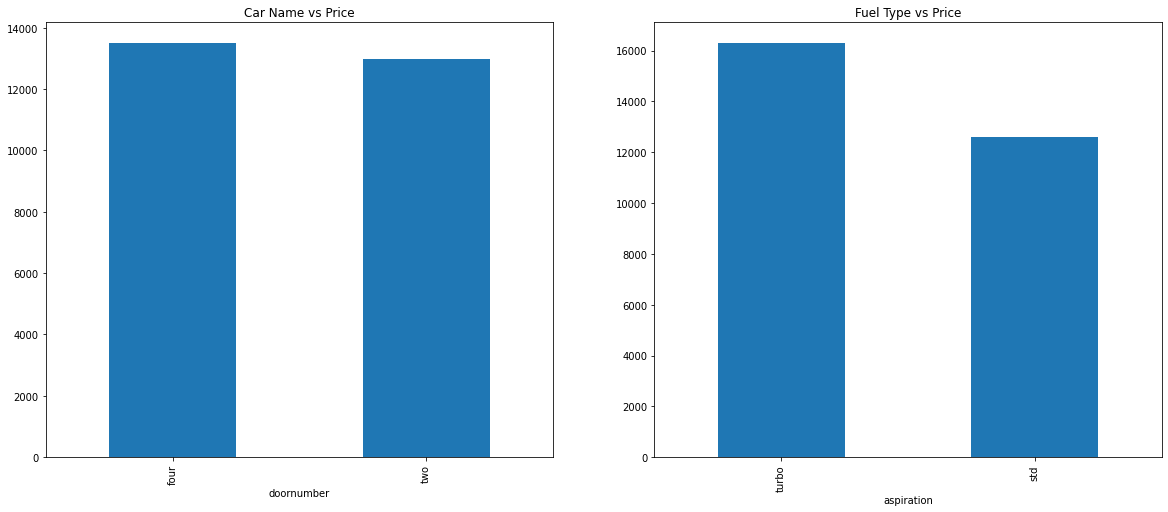

In [100]:
plt.subplots(figsize=(20,8))

plt.subplot(1,2,1)
car_data.groupby('doornumber').price.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Car Name vs Price")

plt.subplot(1,2,2)
car_data.groupby('aspiration').price.mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Fuel Type vs Price")


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
fueltype_le=LabelEncoder()
car_data['fueltype']= fueltype_le.fit_transform(car_data.fueltype)
enginelocation_le=LabelEncoder()
car_data['enginelocation']=enginelocation_le.fit_transform(car_data.enginelocation)
cylindernumber_le=LabelEncoder()
car_data['cylindernumber']=cylindernumber_le.fit_transform(car_data.cylindernumber)
enginetype_le=LabelEncoder()
car_data['enginetype']=enginetype_le.fit_transform(car_data.enginetype)
carbody_le=LabelEncoder()
car_data['carbody']=carbody_le.fit_transform(car_data.carbody)
aspiration_le=LabelEncoder()
car_data['aspiration']=aspiration_le.fit_transform(car_data.aspiration)
doornumber_le = LabelEncoder()
car_data['doornumber'] = doornumber_le.fit_transform(car_data.doornumber)
drivewheel_le = LabelEncoder()
car_data['drivewheel'] = doornumber_le.fit_transform(car_data.drivewheel)
fuelsystem_le = LabelEncoder()
car_data['fuelsystem'] = fuelsystem_le.fit_transform(car_data.fuelsystem)

car_data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0


In [103]:
features = car_data.drop(['price','CarName'] , axis=1)
target = car_data['price']


In [104]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(features,target,test_size=0.25,random_state=52)


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

In [106]:
linear_reg = LinearRegression()

In [107]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [108]:
linear_reg.score(X_test,y_test)

0.7921952359778414

In [109]:
y_pred = linear_reg.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error , accuracy_score
from sklearn.metrics import r2_score
mse = mean_squared_error(y_pred, y_test)
r2_score = r2_score(y_pred, y_test)

In [111]:
mse

9263276.087540435

In [112]:
r2_score

0.7706152275317482

In [113]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [118]:
y_train = LabelEncoder().fit_transform(y_train)
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [119]:
y_pred = model.predict(X_test)

In [125]:
acc = accuracy_score(y_test,y_pred)


In [136]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RF_prediction=RF.predict(X_test)

